# Supermarket Sales
---

## Question

1. Customer Distribution
2. Product Distribution
- Berapa total penjualan per cabang?
- Berapa total penjualan per jenis produk?
- Berapa total laba kotor (gross income) dari setiap branch?
- Berapa rata-rata rating produk di setiap cabang?
- Apakah ada korelasi antara unit price dan rating produk?
- Bagaimana tren penjualan dari waktu ke waktu?
- Bagaimana tren pendapatan dari waktu ke waktu?
- Apakah ada perbedaan dalam jumlah pembelian dan rata-rata total belanja antara jenis pelanggan (Customer type)?
- Produk mana yang memberikan keuntungan kotor tertinggi?
3. Payment
- Metode pembayaran apa yang paling umum digunakan?
- Apakah ada perbedaan jumlah pembayaran antara metode pembayaran yang berbeda?
- Apakah ada tren perubahan metode pembayaran dari waktu ke waktu?

## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec

---
## Data Wrangling
---

### Data Gathering

In [2]:
# Import Data
raw_df = pd.read_csv("data\\supermarket_sales.csv", delimiter=",")
raw_df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
raw_df = raw_df.drop(columns=['Invoice ID'])
raw_df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Assessing Data 

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income             

In [5]:
raw_df.isnull().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
raw_df.duplicated().sum()

0

In [7]:
raw_df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


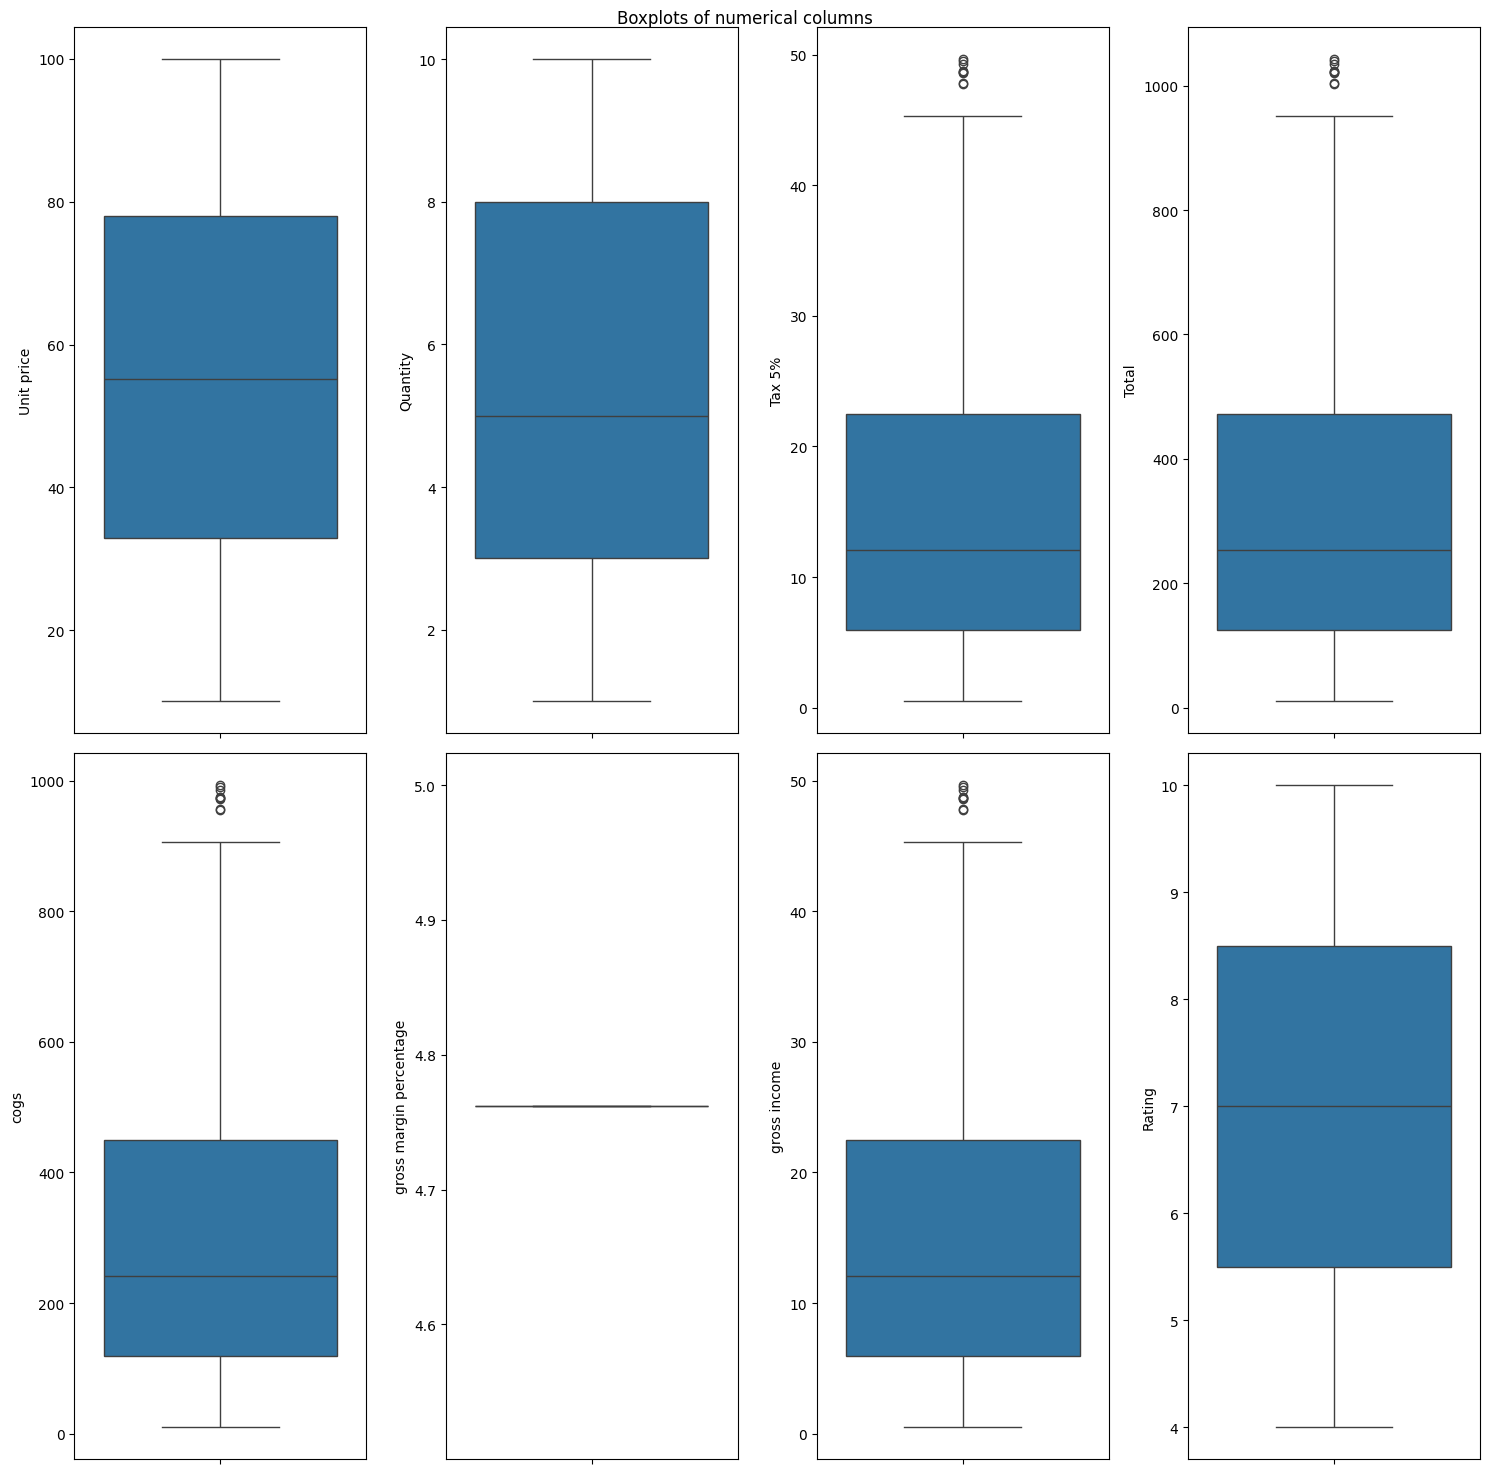

In [8]:
numerical_cols = raw_df.select_dtypes(include=np.number).columns.tolist()
fig, axes = plt.subplots(2, 4, figsize=(15, 15))
fig.suptitle('Boxplots of numerical columns')
for i, col in enumerate(numerical_cols):
    sns.boxplot(raw_df[col], ax=axes[i//4, i%4])

plt.tight_layout()

### Cleaning Data

In [16]:
raw_df['Date'] = pd.to_datetime(raw_df['Date'])

In [17]:
raw_df['Time'] = pd.to_datetime(raw_df['Time'])

C:\Users\Abdullah NJ\AppData\Local\Temp\ipykernel_18860\3179670576.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  raw_df['Time'] = pd.to_datetime(raw_df['Time'])


---

## Exploratory Data Analysis

### 1. Customers Distribution

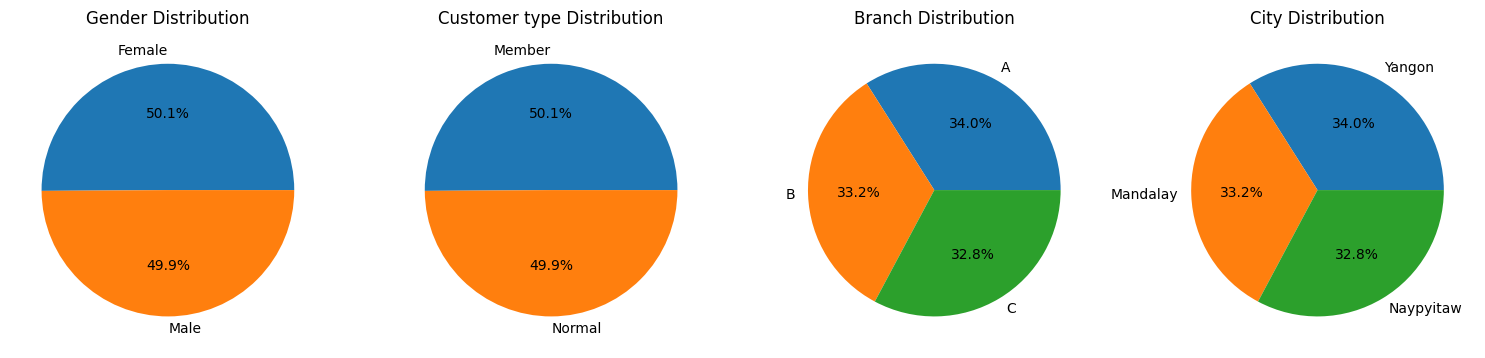

In [9]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))  # Create 3 subplots for 3 string columns

for idx, column in enumerate(['Gender', 'Customer type', 'Branch', 'City']):
    ax = axes[idx]
    counts = raw_df[column].value_counts()  # Count occurrences of each category
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%')
    ax.set_title(f'{column} Distribution')

plt.tight_layout()
plt.show()

### 2. Product Distribution

  Branch  Quantity
0      A      1859
1      B      1820
2      C      1831
   Branch            Product line  Quantity
0       A  Electronic accessories       322
1       A     Fashion accessories       263
2       A      Food and beverages       313
3       A       Health and beauty       257
4       A      Home and lifestyle       371
5       A       Sports and travel       333
6       B  Electronic accessories       316
7       B     Fashion accessories       297
8       B      Food and beverages       270
9       B       Health and beauty       320
10      B      Home and lifestyle       295
11      B       Sports and travel       322
12      C  Electronic accessories       333
13      C     Fashion accessories       342
14      C      Food and beverages       369
15      C       Health and beauty       277
16      C      Home and lifestyle       245
17      C       Sports and travel       265


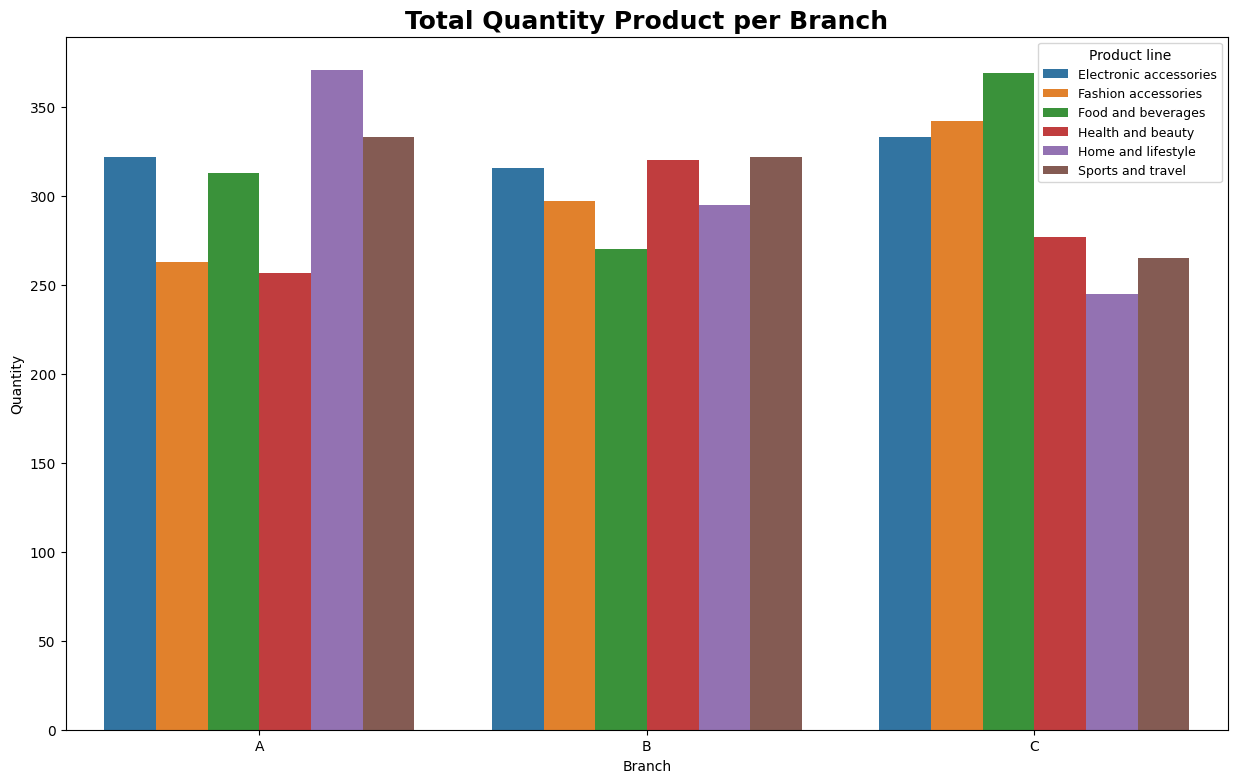

In [10]:
# 1. Berapa Total Penjualana Per Cabang?
print(raw_df.groupby('Branch')['Quantity'].sum().reset_index())

print(raw_df.groupby(['Branch', 'Product line'])['Quantity'].sum().reset_index())

product_quantity_branch = raw_df.groupby(['Branch', 'Product line'])['Quantity'].sum().reset_index()

# Membuat bar chart
plt.figure(figsize=(15, 9))
sns.barplot(data=product_quantity_branch, x='Branch', y='Quantity', hue='Product line')
plt.xlabel('Branch')
plt.ylabel('Quantity')
plt.title('Total Quantity Product per Branch', fontsize=18, fontweight='bold')
plt.legend(title='Product line', fontsize=9)
plt.show()

Product line
Electronic accessories    170
Fashion accessories       178
Food and beverages        174
Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Name: Quantity, dtype: int64


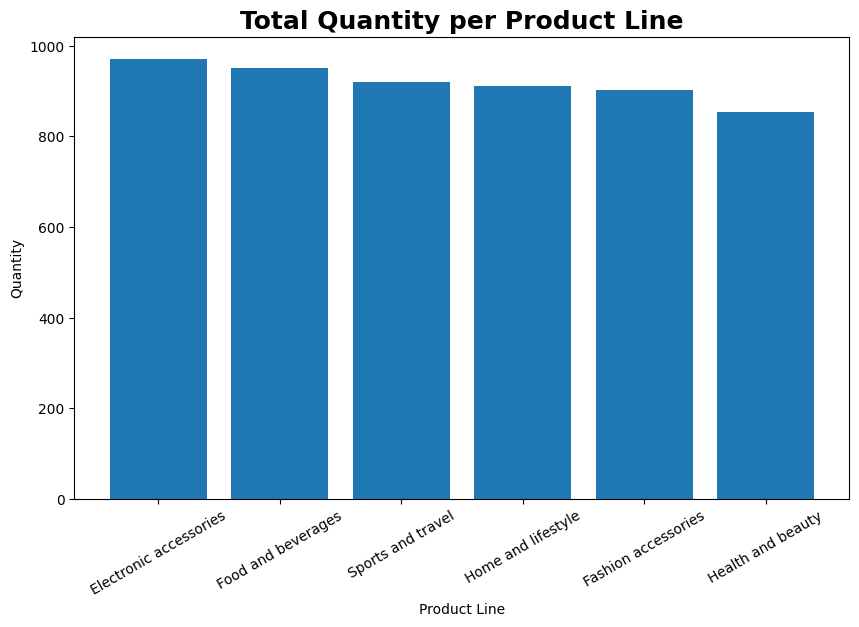

In [11]:
# 2. Berapa Total Penjualan Per Jenis Produk?
print(raw_df.groupby(by='Product line')['Quantity'].count())

product_quantity = raw_df.groupby('Product line')['Quantity'].sum().sort_values(ascending=False)

# Membuat plot
plt.figure(figsize=(10,6))
plt.bar(x=product_quantity.index, height=product_quantity.values)
plt.xlabel('Product Line')
plt.xticks(rotation=30)
plt.ylabel('Quantity')
plt.title('Total Quantity per Product Line', fontsize=18, fontweight='bold')
plt.show()

  Branch  gross income
0      C     5265.1765
1      A     5057.1605
2      B     5057.0320


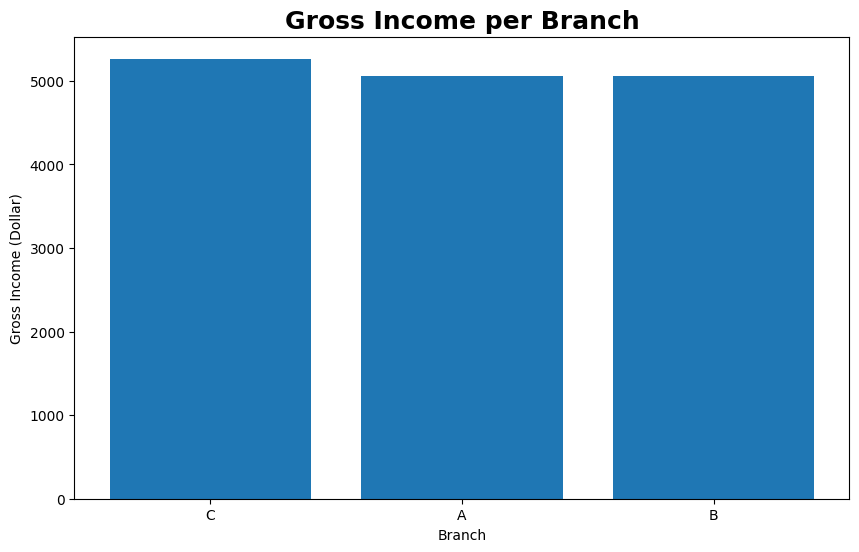

In [12]:
# 3. Berapa Total laba kotor (gross income) dari setiap produk?
print(raw_df.groupby('Branch')['gross income'].sum().sort_values(ascending=False).reset_index())

branch_income = raw_df.groupby('Branch')['gross income'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
plt.bar(data=branch_income, x='Branch', height='gross income')
plt.title("Gross Income per Branch", fontsize=18, fontweight='bold')
plt.xlabel("Branch")
plt.ylabel("Gross Income (Dollar)")
plt.show()

  Branch    Rating
0      A  7.027059
1      B  6.818072
2      C  7.072866


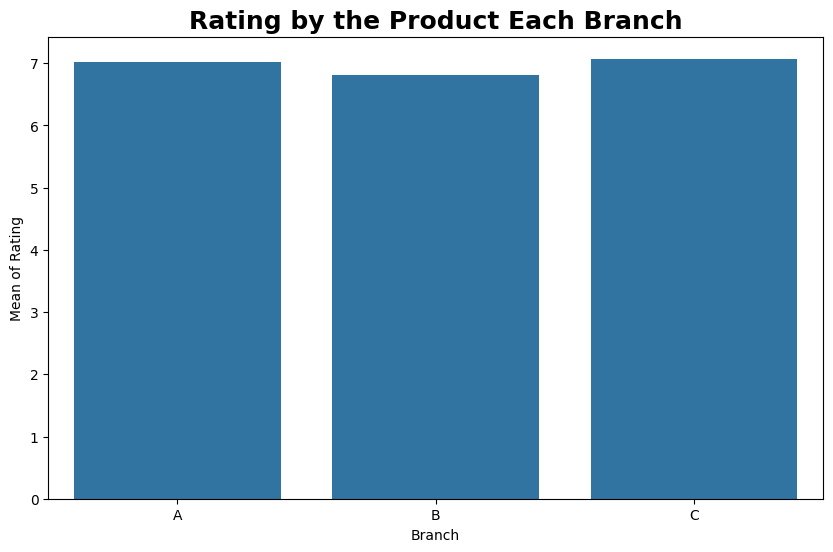

In [13]:
# 4. Berapa Rata-Rata Rating Produk di Setiap Cabang?
print(raw_df.groupby(['Branch'])['Rating'].mean().reset_index())

branch_rating = raw_df.groupby(['Branch'])['Rating'].mean().reset_index()

# Membuat bar Chart
plt.figure(figsize=(10,6))
sns.barplot(data=branch_rating, x='Branch', y='Rating')
plt.title("Rating by the Product Each Branch", fontsize=18, fontweight='bold')
plt.xlabel("Branch")
plt.ylabel("Mean of Rating")
plt.show()

            Unit price    Rating
Unit price    1.000000 -0.008778
Rating       -0.008778  1.000000


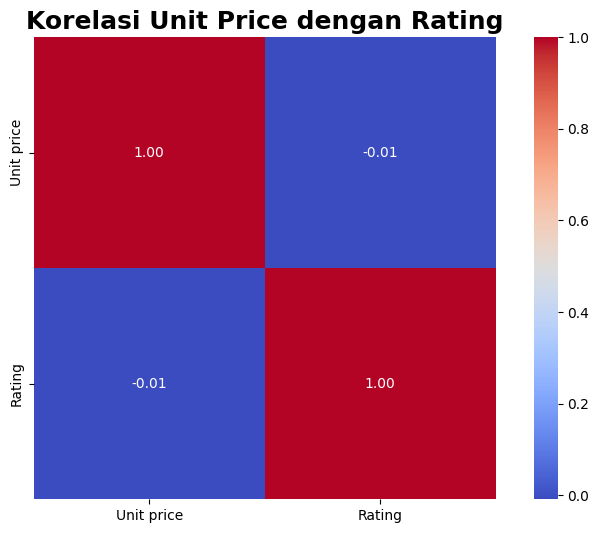

In [14]:
# 5. Korelasi Unit Price dengan Rating Produk
print(raw_df[['Unit price', 'Rating']].corr())

plt.figure(figsize=(10, 6))
sns.heatmap(raw_df[['Unit price', 'Rating']].corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Korelasi Unit Price dengan Rating", fontsize=18, fontweight='bold')
plt.show()

In [15]:
# 6. Bagaimana Trend Penjualan dari Waktu ke Waktu?
grouped_df = raw_df.groupby(raw_df['Date'].dt.month)['Quantity'].sum().reset_index()

AttributeError: Can only use .dt accessor with datetimelike values

             Product line       Total
0  Electronic accessories  54337.5315
1     Fashion accessories  54305.8950
2      Food and beverages  56144.8440
3       Health and beauty  49193.7390
4      Home and lifestyle  53861.9130
5       Sports and travel  55122.8265


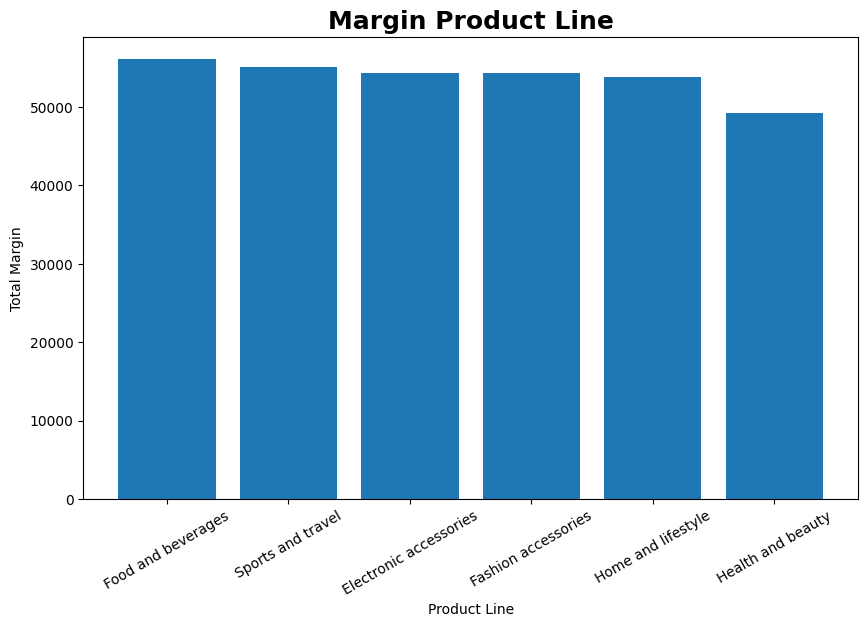

In [ ]:
# Gross Income Per Produk

print(raw_df.groupby(['Product line'])['Total'].sum().reset_index())

product_total = raw_df.groupby(['Product line'])['Total'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
plt.bar(data=product_total, x='Product line', height='Total')
plt.title("Margin Product Line", fontsize=18, fontweight='bold')
plt.xlabel("Product Line")
plt.xticks(rotation=30)
plt.ylabel("Total Margin")
plt.show()